In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
pip install keras-metrics


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls

gdrive/  sample_data/


In [0]:
cd gdrive/My\ Drive/Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
ls

'Back Probagation coding problem [A. 2].ipynb'   MRNet-v1.0.zip
'Copy of Offensive_tweets.ipynb'                 PR_Project#4.ipynb
'Copy of Project#3_PR.ipynb'                     saved_model_2.h5
 __MACOSX/                                       saved_model.h5
 MRNet-v1.0/


In [0]:
!wget   http://download.cs.stanford.edu/deep/MRNet-v1.0.zip

KeyboardInterrupt: ignored

In [0]:
!unzip "MRNet-v1.0.zip"

Archive:  MRNet-v1.0.zip
warning [MRNet-v1.0.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
replace MRNet-v1.0/valid-abnormal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: MRNet-v1.0/valid-abnormal.csv  
  inflating: MRNet-v1.0/valid/axial/1139.npy  
  inflating: MRNet-v1.0/valid/axial/1138.npy  
  inflating: MRNet-v1.0/valid/axial/1249.npy  
  inflating: MRNet-v1.0/valid/axial/1248.npy  
  inflating: MRNet-v1.0/valid/axial/1207.npy  
  inflating: MRNet-v1.0/valid/axial/1213.npy  
  inflating: MRNet-v1.0/valid/axial/1171.npy  
  inflating: MRNet-v1.0/valid/axial/1165.npy  
  inflating: MRNet-v1.0/valid/axial/1159.npy  
  inflating: MRNet-v1.0/valid/axial/1158.npy  
  inflating: MRNet-v1.0/valid/axial/1164.npy  
  inflating: MRNet-v1.0/valid/axial/1170.npy  
  inflating: MRNet-v1.0/valid/axial/1212.npy  
  inflating: MRNet-v1.0/valid/axi

In [0]:
ls

'Back Probagation coding problem [A. 2].ipynb'   MRNet-v1.0/
'Copy of Offensive_tweets.ipynb'                 MRNet-v1.0.zip
'Copy of Project#3_PR.ipynb'                     PR_Project#4.ipynb
 __MACOSX/


In [0]:
import numpy as np
import glob
data_axial = []
for i in sorted (glob.glob('MRNet-v1.0/train/axial/*.npy')):
  data_axial.append(np.load(i))
  
  
print(len(data_axial))

1130


In [0]:
len(data_axial)

1130

In [0]:
data_coronal = []
for i in sorted (glob.glob('MRNet-v1.0/train/coronal/*.npy')):
  data_coronal.append(np.load(i))
  
  
  

In [0]:
len(data_coronal)

1130

In [0]:
data_sagittal = []
for i in sorted (glob.glob('MRNet-v1.0/train/sagittal/*.npy')):
  data_sagittal.append(np.load(i))

In [0]:
len(data_sagittal)

1130

In [0]:
axial_test = []
for i in sorted(glob.glob('MRNet-v1.0/valid/axial/*.npy')):
    axial_test.append(np.load(i))


In [0]:
len(axial_test)

120

In [0]:
coronal_test = []
for i in sorted(glob.glob('MRNet-v1.0/valid/coronal/*.npy')):
    coronal_test.append(np.load(i))

In [0]:
len(coronal_test)

120

In [0]:
sagittal_test = []
for i in sorted(glob.glob('MRNet-v1.0/valid/sagittal/*.npy')):
    sagittal_test.append(np.load(i))

In [0]:
# print(data_coronal[1])
len(sagittal_test)

120

In [0]:
from keras.layers import Input,Dense,Flatten
from keras.applications.nasnet import NASNetLarge
from keras.applications.inception_v3 import InceptionV3


Using TensorFlow backend.


In [0]:
base_model=NASNetLarge(input_shape=None, include_top=False,input_tensor=Input(shape=(256,256,3)), weights='imagenet', pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.
343613440/343610240 [==============================] - 4s 0us/step


In [0]:
base_model_2 = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(256,256,3)), input_shape=None, pooling=None, classes=1000)

In [0]:
from keras.models import Model

In [0]:
import numpy as np
import math

In [0]:
labels_train_abnormal = np.loadtxt("MRNet-v1.0/train-abnormal.csv", delimiter=',')


In [0]:

labels_train_acl = np.loadtxt("MRNet-v1.0/train-acl.csv", delimiter=',')

In [0]:
labels_train_meniscus = np.loadtxt("MRNet-v1.0/train-meniscus.csv", delimiter=',')

In [0]:
labels_dict = {'[0. 0. 0.]' : np.array([1, 0, 0, 0, 0, 0, 0, 0]),
               '[0. 0. 1.]' : np.array([0, 1, 0, 0, 0, 0, 0, 0]),
               '[0. 1. 0.]' : np.array([0, 0, 1, 0, 0, 0, 0, 0]),
               '[0. 1. 1.]' : np.array([0, 0, 0, 1, 0, 0, 0, 0]),
               '[1. 0. 0.]' : np.array([0, 0, 0, 0, 1, 0, 0, 0]),
               '[1. 0. 1.]' : np.array([0, 0, 0, 0, 0, 1, 0, 0]),
               '[1. 1. 0.]' : np.array([0, 0, 0, 0, 0, 0, 1, 0]),
               '[1. 1. 1.]' : np.array([0, 0, 0, 0, 0, 0, 0, 1])}
training_labels = np.concatenate((labels_train_abnormal , labels_train_acl ,labels_train_meniscus), axis=1)[:,[1, 3, 5]]

training_labels = list(training_labels)
for i in range(len(training_labels)):
   training_labels[i] = labels_dict[str(training_labels[i])]
training_labels = np.array(training_labels)

In [0]:
print(training_labels.shape)

(1130, 8)


In [0]:
# import math
print(len(data_sagittal))

1130


In [0]:
training_data_sagittal=[]
for i in range (len(data_sagittal)):
    training_data_sagittal.append([])
    mid=math.floor((data_sagittal[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        training_data_sagittal[i].append(data_sagittal[i][j])
        


In [0]:
print(len(training_data_sagittal))
training_data_sagittal = np.asarray(training_data_sagittal)
print(training_data_sagittal.shape)
training_data_sagittal=np.sort(training_data_sagittal)

1130
(1130, 3, 256, 256)


In [0]:
x=np.asarray(training_data_sagittal)
print(x.shape)
x=np.reshape(x,(1130,256,256,3))
print(x.shape)


(1130, 3, 256, 256)
(1130, 256, 256, 3)


In [0]:
training_data_axial=[]
for i in range (len(data_axial)):
    training_data_axial.append([])
    mid=math.floor((data_axial[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        training_data_axial[i].append(data_axial[i][j])
        


In [0]:
training_data_coronal=[]
for i in range (len(data_coronal)):
    training_data_coronal.append([])
    mid=math.floor((data_coronal[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        training_data_coronal[i].append(data_coronal[i][j])
        


In [0]:
training_data_sagittal=np.reshape(training_data_sagittal,(1130,256,256,3))
training_data_axial=np.reshape(training_data_axial,(1130,256,256,3))
training_data_coronal=np.reshape(training_data_coronal,(1130,256,256,3))


In [0]:
x=np.asarray(training_data_coronal[0])
print(x.shape)
x=np.asarray(training_data_axial[0])
print(x.shape)


(256, 256, 3)
(256, 256, 3)


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
training_data_sagittal=np.asarray(training_data_sagittal)
training_labels=np.asarray(training_labels)

training_data_axial=np.asarray(training_data_axial)

training_data_coronal=np.asarray(training_data_coronal)


In [0]:
training_data_axial=np.sort(training_data_axial)
training_data_coronal=np.sort(training_data_coronal)

In [0]:
print(training_data_sagittal.shape)
print(training_labels.shape)

(1130, 256, 256, 3)
(1130, 8)


In [0]:
import keras
import keras_metrics as km


# add a global spatial average pooling layer
x = base_model.output

# let's add a fully-connected layer
x=Flatten()(x)

predictions = Dense(8, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

for layer in model.layers[:1036]:
    layer.trainable = False
for layer in model.layers[1036:]:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy',metrics=["accuracy",km.binary_precision(), km.binary_recall()])

history = model.fit(test_data_coronal,test_labels, epochs=50, batch_size=21, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])
# history = model.fit(training_data_axial,training_labels, epochs=50, batch_size=21, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min"),ModelCheckpoint(filepath='saved_model.h5', verbose=1, save_best_only=True)])


Train on 114 samples, validate on 6 samples
Epoch 1/50
 - 12s - loss: 0.6206 - acc: 0.6612 - precision: 0.1951 - recall: 0.3200 - val_loss: 1.8653 - val_acc: 0.5208 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
 - 2s - loss: 0.3726 - acc: 0.8673 - precision: 0.5000 - recall: 0.0800 - val_loss: 1.6318 - val_acc: 0.6042 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
 - 2s - loss: 0.3181 - acc: 0.8783 - precision: 0.3333 - recall: 0.0400 - val_loss: 1.5489 - val_acc: 0.6458 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
 - 2s - loss: 0.2704 - acc: 0.8794 - precision: 0.3333 - recall: 0.0400 - val_loss: 1.5608 - val_acc: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
 - 2s - loss: 0.2333 - acc: 0.9002 - precision: 0.8571 - recall: 0.2400 - val_loss: 1.5896 - val_acc: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/50
 - 2s - loss: 0.2028 - acc: 0.9331 - precision: 0.9231 - recall: 0.4800 - val_l

In [0]:
acc_train_axial = history.history['acc']
print(acc_train_axial)

acc_val_axial = history.history['val_acc']
print(acc_val_axial)

loss_axial = history.history['loss']
print(loss_axial)

loss_val_axial = history.history['val_loss']
print(loss_val_axial)


[0.6611841995465128, 0.8673245624492043, 0.8782894768212971, 0.8793859701407584, 0.90021928517442, 0.9331140377019581, 0.9396929803647494, 0.9484649096664629, 0.9517543833506735, 0.9583333307190945, 0.9703947368421053, 0.9813596386658517, 0.9736842152319456, 0.9868421068317011, 0.9846491186242354, 0.9857456276291295, 0.9923245765660939, 0.9912280722668296, 0.9956140361334148, 0.9934210636113819, 0.9956140361334148, 0.9978070212037939, 0.9978070164981642, 0.9978070164981642, 0.9967105278843328, 0.9978070212037939, 0.9967105341585059, 1.0, 0.998903508249082, 0.9967105231787029, 0.9967105388641357, 0.9978070212037939, 1.0, 0.9978070164981642, 0.9978070164981642, 1.0, 1.0, 1.0, 0.998903508249082, 1.0, 1.0, 1.0, 1.0, 0.998903508249082, 1.0, 1.0, 1.0, 1.0, 0.9967105247472462, 1.0]
[0.5208333134651184, 0.6041666865348816, 0.6458333134651184, 0.6666666865348816, 0.6666666865348816, 0.625, 0.625, 0.625, 0.6458333134651184, 0.6458333134651184, 0.6875, 0.6875, 0.6875, 0.6666666865348816, 0.666666

Text(0.5, 1.0, 'Coronal Test Accuracy')

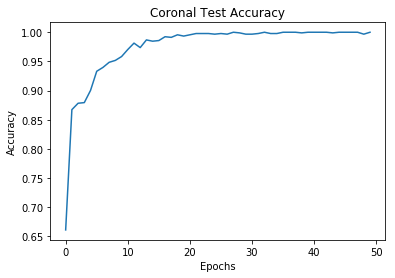

In [0]:
import matplotlib.pyplot as plt

plt.plot(acc_train_axial)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Coronal Test Accuracy")

Text(0.5, 1.0, 'Coronal Validation Accuracy')

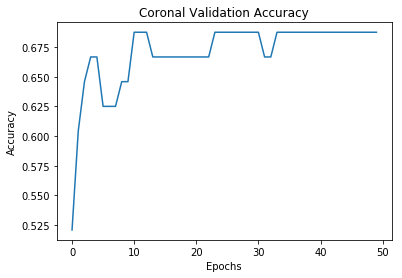

In [0]:
plt.plot(acc_val_axial)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Coronal Validation Accuracy")

Text(0.5, 1.0, 'Coronal Loss')

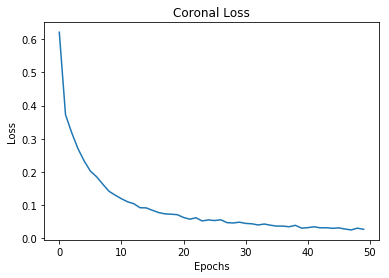

In [0]:
plt.plot(loss_axial)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Coronal Loss")

Text(0.5, 1.0, 'Coronal Validation Loss')

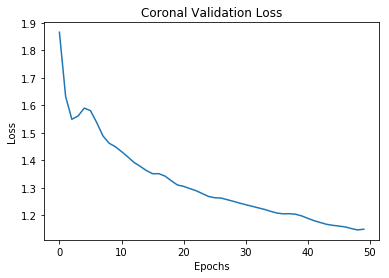

In [0]:
plt.plot(loss_val_axial)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Coronal Validation Loss")

In [0]:
import keras
import keras_metrics as km


# add a global spatial average pooling layer
x = base_model_2.output

# let's add a fully-connected layer
x=Flatten()(x)

predictions = Dense(8, activation='sigmoid')(x)

# this is the model we will train
model_2 = Model(inputs=base_model_2.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

for layer in model.layers[:1036]:
    layer.trainable = False
for layer in model.layers[1036:]:
    layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy',metrics=["accuracy",km.binary_precision(), km.binary_recall()])

history_2 = model.fit(training_data_axial,training_labels, epochs=50, batch_size=21, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min"), ModelCheckpoint(filepath='saved_model_2.h5', verbose=1, save_best_only=True)])


NameError: ignored

In [0]:
test_data_sagittal=[]
for i in range (len(sagittal_test)):
    test_data_sagittal.append([])
    mid=math.floor((sagittal_test[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        test_data_sagittal[i].append(sagittal_test[i][j])
        
        
test_data_axial=[]
for i in range (len(axial_test)):
    test_data_axial.append([])
    mid=math.floor((axial_test[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        test_data_axial[i].append(axial_test[i][j])
        
        
test_data_coronal=[]
for i in range (len(coronal_test)):
    test_data_coronal.append([])
    mid=math.floor((coronal_test[i].shape[0])/2)
    for j in range (mid-1,mid+2):
        test_data_coronal[i].append(coronal_test[i][j])        

In [0]:
test_data_coronal=np.asarray(test_data_coronal)
test_data_coronal=np.sort(test_data_coronal)

test_data_sagittal=np.asarray(test_data_sagittal)
test_data_sagittal=np.sort(test_data_sagittal)


test_data_axial=np.asarray(test_data_axial)
test_data_axial=np.sort(test_data_axial)

In [0]:
test_data_sagittal=np.reshape(test_data_sagittal,(120,256,256,3))
test_data_axial=np.reshape(test_data_axial,(120,256,256,3))
test_data_coronal=np.reshape(test_data_coronal,(120,256,256,3))


In [0]:
labels_test_abnormal = np.loadtxt("MRNet-v1.0/valid-abnormal.csv", delimiter=',')


In [0]:
labels_test_acl = np.loadtxt("MRNet-v1.0/valid-acl.csv", delimiter=',')


In [0]:
labels_test_meniscus = np.loadtxt("MRNet-v1.0/valid-meniscus.csv", delimiter=',')


In [0]:
labels_dict_test = {'[0. 0. 0.]' : np.array([1, 0, 0, 0, 0, 0, 0, 0]),
               '[0. 0. 1.]' : np.array([0, 1, 0, 0, 0, 0, 0, 0]),
               '[0. 1. 0.]' : np.array([0, 0, 1, 0, 0, 0, 0, 0]),
               '[0. 1. 1.]' : np.array([0, 0, 0, 1, 0, 0, 0, 0]),
               '[1. 0. 0.]' : np.array([0, 0, 0, 0, 1, 0, 0, 0]),
               '[1. 0. 1.]' : np.array([0, 0, 0, 0, 0, 1, 0, 0]),
               '[1. 1. 0.]' : np.array([0, 0, 0, 0, 0, 0, 1, 0]),
               '[1. 1. 1.]' : np.array([0, 0, 0, 0, 0, 0, 0, 1])}
test_labels = np.concatenate((labels_test_abnormal , labels_test_acl ,labels_test_meniscus), axis=1)[:,[1, 3, 5]]

test_labels = list(test_labels)
for i in range(len(test_labels)):
   test_labels[i] = labels_dict[str(test_labels[i])]
test_labels = np.array(test_labels)

In [0]:
y = model.evaluate(test_data_coronal, test_labels, verbose=0, batch_size=21)
print(y)

[1.2361139744520186, 0.6187499955296516, 0.0, 0.0]


In [0]:
# Calculating f-measure
from keras import backend as K
from keras.optimizers import Adam


def f_measure(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=10**-8, decay=0.0, amsgrad=False)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=[f_measure])
history_f = model.fit(test_data_coronal,test_labels, epochs=50, batch_size=21, validation_split=0.05, verbose = 2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")])



Train on 114 samples, validate on 6 samples
Epoch 1/50
 - 17s - loss: 0.9833 - f_measure: 0.3847 - val_loss: 1.9216 - val_f_measure: 0.0000e+00
Epoch 2/50
 - 2s - loss: 0.7965 - f_measure: 0.6828 - val_loss: 1.8011 - val_f_measure: 0.0000e+00
Epoch 3/50
 - 2s - loss: 0.6716 - f_measure: 0.7363 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 4/50
 - 2s - loss: 0.5819 - f_measure: 0.8124 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 5/50
 - 2s - loss: 0.4684 - f_measure: 0.8431 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 6/50
 - 2s - loss: 0.5284 - f_measure: 0.8256 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 7/50
 - 2s - loss: 0.4250 - f_measure: 0.8759 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 8/50
 - 2s - loss: 0.4073 - f_measure: 0.8856 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 9/50
 - 2s - loss: 0.4184 - f_measure: 0.8774 - val_loss: 2.0148 - val_f_measure: 0.0000e+00
Epoch 10/50
 - 2s - loss: 0.4326 - f_measure: 0.8673 - val_loss:

In [0]:
f_measure_train_axial = history_f.history['f_measure']
print(f_measure_train_axial)

f_measure_val_axial = history_f.history['val_f_measure']
print(f_measure_val_axial)

[0.38465777294416176, 0.6827851126068517, 0.7363259831541463, 0.8123876970065268, 0.8430652649779069, 0.8256407050709975, 0.8759463868643108, 0.8856452530936191, 0.8774363586777135, 0.8673026138230374, 0.8829874333582426, 0.8808624305223164]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Coronal Test f_measure')

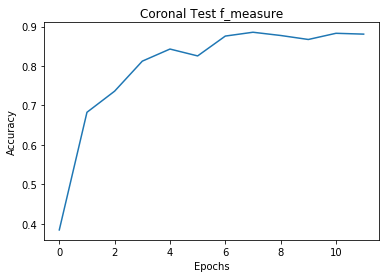

In [0]:
plt.plot(f_measure_train_axial)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Coronal Test f_measure")

Text(0.5, 1.0, 'Coronal  Validation f_measure')

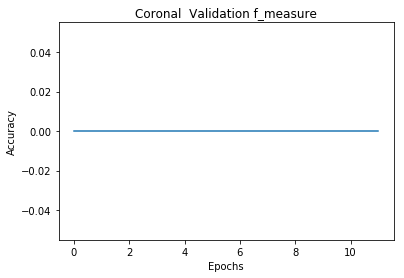

In [0]:
plt.plot(f_measure_val_axial)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Coronal  Validation f_measure")

In [0]:
#ensembling 

from keras.models import load_model
models=[]

# for i in range(0,2):

modelTemp=load_model('saved_model.h5') # load model
modelTemp.name="en_model" # change name to be unique
models.append(modelTemp)

In [0]:
modelTemp=load_model('saved_model_2.h5') # load model
modelTemp.name="en_model_2" # change name to be unique
models.append(modelTemp)

In [0]:
def ensembleModels(models, model_input):
    # collect outputs of models in a list
    yModels=[model(model_input) for model in models] 
    # averaging outputs
    yAvg=layers.average(yModels) 
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=yAvg, name='ensemble')  
   
    return modelEns

In [0]:
model_input = Input(shape=models[0].input_shape[1:]) 
modelEns = ensembleModels(models, model_input)
model.summary()

# modelEns.save(path2ensModel)

In [0]:
modelEns=load_model(path2ensModel)
modelEns.summary()
y=modelEns.predict(x)